In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)

# Trainign batch size 
batch_size = 100
# Number of training epochs
epochs = 50
# Fraction of the training data to be used as validation
val_split = 0.3
# Learning rate
lr=0.05


In [34]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, 'Class 5')

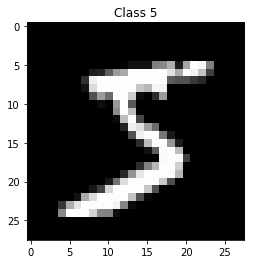

In [35]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [36]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

In [37]:
Y_Train = y_train/10.
print(y_test)
Y_Test = y_test/10.
print(Y_Test)

[7 2 1 ... 4 5 6]
[0.7 0.2 0.1 ... 0.4 0.5 0.6]


In [0]:
# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Polling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



#BatchNormalization(axis=-1)
#model.add(Conv2D(64,(3, 3)))
#model.add(Activation('relu'))
#BatchNormalization(axis=-1)
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))

# Fully connected layer
model.add(Flatten())

#BatchNormalization()
model.add(Dense(128))
model.add(Activation('relu'))
#BatchNormalization()
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_13 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)              

In [0]:
#model.compile(optimizer=SGD(lr=lr), loss='mean_squared_error', metrics=['accuracy'])
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['accuracy'])

In [41]:
#model.fit(X_train, Y_train, batch_size=batch, nb_epoch=epochs, validation_data=(X_test, Y_test))

# Train
history = model.fit(X_train, Y_Train, validation_split=val_split, epochs=epochs, batch_size=batch_size, verbose=1)


Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 5s 111us/step - loss: 0.0153 - acc: 0.0980 - val_loss: 0.0072 - val_acc: 0.0986
Epoch 2/50
42000/42000 [==============================] - 4s 102us/step - loss: 0.0056 - acc: 0.0985 - val_loss: 0.0052 - val_acc: 0.0987
Epoch 3/50
42000/42000 [==============================] - 4s 102us/step - loss: 0.0040 - acc: 0.0986 - val_loss: 0.0038 - val_acc: 0.0986
Epoch 4/50
42000/42000 [==============================] - 4s 102us/step - loss: 0.0033 - acc: 0.0986 - val_loss: 0.0032 - val_acc: 0.0987
Epoch 5/50
42000/42000 [==============================] - 4s 102us/step - loss: 0.0028 - acc: 0.0986 - val_loss: 0.0033 - val_acc: 0.0987
Epoch 6/50
42000/42000 [==============================] - 4s 102us/step - loss: 0.0025 - acc: 0.0986 - val_loss: 0.0030 - val_acc: 0.0986
Epoch 7/50
42000/42000 [==============================] - 4s 102us/step - loss: 0.0021 - acc: 0.0986 - val_loss: 0.0029 - 

10000/10000 [==============================] - 1s 73us/step
Summary: Loss over the test dataset: 0.00, Accuracy: 0.10


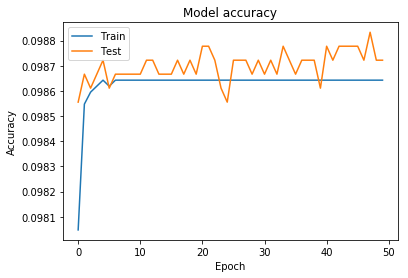

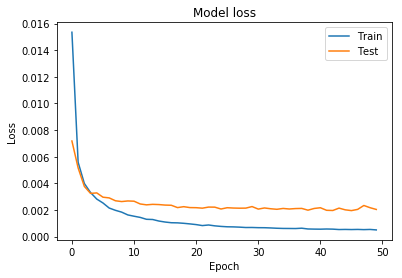

In [42]:
# Training History Visualization
import matplotlib.pyplot as plt

# Evaluate
evaluation = model.evaluate(X_test, Y_Test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
predictions = model.predict_classes(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)

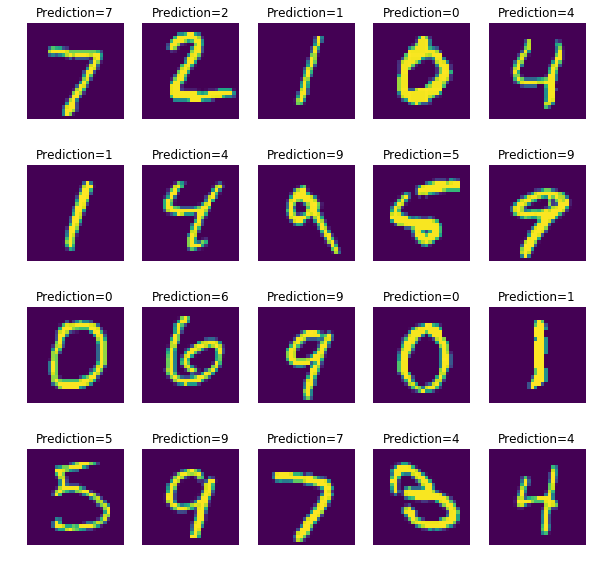

In [44]:
Nplot = 20
plt.figure(figsize=(10,10))
Y=model.predict(X_test) 
Y=Y*10.
for n in range(Nplot):
  X=X_test[n,:]
  ax = plt.subplot(4, 5, n+1)
  plt.imshow(X.reshape(28,28))
  plt.axis('off')
  plt.title('Prediction='+str(round(float(Y[n]))))
plt.show()